<a href="https://colab.research.google.com/github/popitree/deep-learning/blob/master/2_Binary_Classification_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to have IMDB Data set. 25K training and 25K test data.
Each set has 50% positive and 50% neagative reviews.
It comes with Keras and the data is preprocessed.
The reviews ie sequence of words have been turned into sequence of integeres. Where each integer stands for a specific word in dictionary.

## Data Load

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import imdb

In [3]:
# While loading the data we have option to select only eg top 10K words, 15K words, also we can skip top 30-40 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, skip_top=0)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(25000,)

In [5]:
# So for any review, the word index(integer corresponding to the word can be max 10K)
print(len(train_data[800]),max(train_data[800]))

166 7741


In [6]:
train_labels[0:5]

array([1, 0, 0, 1, 0])

In [7]:
print(train_data[800])

[1, 13, 435, 11, 1017, 4, 20, 8, 30, 340, 995, 19, 141, 6, 364, 6615, 101, 812, 7, 722, 62, 30, 6, 2211, 866, 4, 816, 16, 4, 118, 173, 7, 4, 20, 21, 2, 253, 33, 4, 1835, 15, 271, 23, 11, 2, 2, 16, 82, 1139, 10, 10, 14, 301, 50, 71, 111, 183, 44, 4, 2, 3689, 15, 71, 340, 616, 4, 436, 22, 16, 862, 2278, 5, 93, 149, 6849, 137, 2621, 8, 68, 2338, 55, 2227, 14, 583, 7, 2, 16, 2, 64, 34, 4, 3201, 7, 6882, 7741, 37, 28, 57, 970, 116, 10, 10, 14, 22, 80, 81, 73, 793, 2, 262, 11, 1170, 2, 121, 2, 3689, 1778, 190, 4, 1174, 80, 1464, 57, 440, 18, 4, 338, 4780, 37, 169, 533, 2, 64, 4, 184, 539, 11, 4, 2, 3689, 79, 1021, 4, 1922, 1558, 663, 92, 21, 32, 4, 1558, 349, 81, 1116, 75, 923, 15, 4, 226, 22, 16, 35, 2, 18, 2, 2366]


In [8]:
test_data.shape

(25000,)

In [9]:
# To verify no word index > 10K
max([max(word_sequence) for word_sequence in train_data])

9999

In [10]:
# Let us check the words
import random
word_index = imdb.get_word_index()
samples = random.sample(list(word_index),5)
samples

1646592/1641221 [==============================] - 0s 0us/step


['aryana', 'inventing', 'like', "war'", 'another\x85']

In [11]:
word_index[samples[0]]

49251

In [0]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

In [13]:
reverse_word_index[5]

'to'

In [14]:
" ".join(reverse_word_index[i] for i in train_data[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [15]:
# This is the correct way to decode. Indices are offset by 3 
# as 0,1,2 are reserved for "padding", "start of sequence" and "unknown"
" ".join(reverse_word_index.get(i-3,'?') for i in train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Data Preparation

You can’t feed lists of integers into a neural network. You have to turn your lists into
tensors. There are two ways to do that:
1. **Pad your lists** so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book).
2. **One-hot encode** your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [0]:
# encoding the integer sequences into a binary matrix
# sequence means train or test data
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    # sequence is an array of word inices
    results[i,sequence] = 1
  return results



In [0]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [0]:
# let us also make labels vectorize ie numpy array from normal array
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels) .astype('float32')

## Building Network

So we have I/P tensor is Vector (2D Tensor - (samples,features)) and labels are 0 and 1. NW that will do good here is simple stack of fully connected Dense layers with Relu activation.

* Input that will take array of 10K values ie Vectorized Text
* We will have 2 hidden layers each with 16 units in each. [Relu activation]
* One output layer with scalar prediction [Sigmoid activation, to give probability of negative or positive sentiment]





  `Dense` implements the operation:
  `output = activation(dot(input, kernel) + bias)`

* What are activation functions, and why are they necessary?

```Without an activation function like relu (also called a non-linearity), the Dense layer
would consist of two linear operations—a dot product and an addition:```

**output = dot(W, input) + b**

```So the layer could only learn linear transformations (affine transformations) of the
input data: the hypothesis space of the layer would be the set of all possible linear
transformations of the input data into a 16-dimensional space. Such a hypothesis
space is too restricted and wouldn’t benefit from multiple layers of representations,
because a deep stack of linear layers would still implement a linear operation: adding
more layers wouldn’t extend the hypothesis space.
In order to get access to a much richer hypothesis space that would benefit from
deep representations, you need a non-linearity, or activation function. relu is the
most popular activation function in deep learning, but there are many other candidates,
which all come with similarly strange names: prelu, elu, and so on.```

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units = 16, activation='relu', input_shape=(10000,)))
model.add(Dense(units = 16, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

### Selecting Loss Function

[KERAS LOSS Functions](https://keras.io/losses/)

Crossentropy is better choice when we are dealing with models that output probabilities
**Crossentropy is a quantity from the field of Information
Theory that measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions.**

In [0]:
from tensorflow.keras import optimizers, losses, metrics

In [0]:
#learning rete
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = metrics.binary_accuracy) 

In [0]:
# As these are already built inside Keras we can use:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# create a validation set by taking 10K records out of 25K records 
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [26]:
history = model.fit(x=partial_x_train,
                    y=partial_y_train,
                    batch_size=512,
                    epochs = 20,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5197 - accuracy: 0.7990 - val_loss: 0.4018 - val_accuracy: 0.8678
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3167 - accuracy: 0.9005 - val_loss: 0.3208 - val_accuracy: 0.8802
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2335 - accuracy: 0.9233 - val_loss: 0.2802 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1817 - accuracy: 0.9423 - val_loss: 0.3006 - val_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1466 - accuracy: 0.9528 - val_loss: 0.2861 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1217 - accuracy: 0.9619 - val_loss: 0.2877 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1006 - accuracy: 0.9692 - val_loss: 0.3062 - val_accuracy: 0.8829
Epoch 8/20
30

In [0]:
# Let us see how it performed on validation data

In [0]:
history_dict = history.history

In [29]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
# we will have these values for each epochs
# So let us plot those
import matplotlib.pyplot as plt


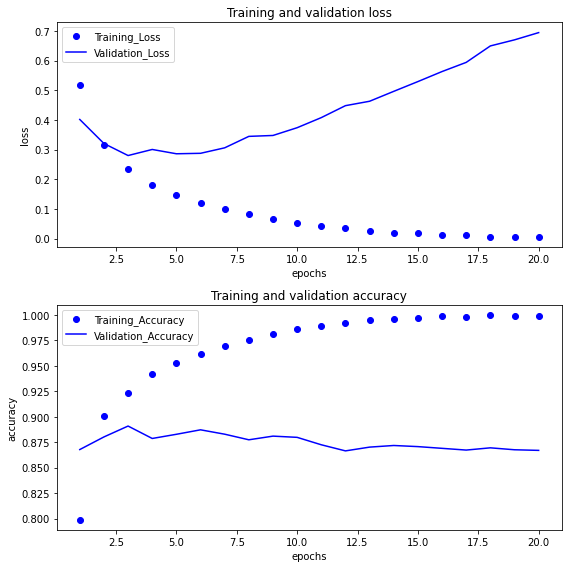

In [31]:
epochs=range(1,len(history_dict['accuracy']) + 1)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(epochs, history_dict['loss'],'bo', label='Training_Loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation_Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training and validation loss")
plt.legend()


plt.subplot(212)
plt.plot(epochs, history_dict['accuracy'],'bo', label='Training_Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation_Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Training and validation accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [0]:
# We can see Training loss decreses with every epoch and accuracy increases with every epoch.
# Thats is what we expect with Gradient Descent
# But for validation set, at 4th epoch the loss is minimum and accuracy is highest
# So clearly this is the case of overfitting
# after 4th epoch it is trying to overfit instead of generalization


In [36]:
# Let us run the model for 4 epochs and check acuracy over test data
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4523 - accuracy: 0.8230
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2572 - accuracy: 0.9085
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1957 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2986 - accuracy: 0.8835


In [37]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.2986 - accuracy: 0.8835


In [34]:
# So we can see we got around 0.29 as loss value and 88% accuracy

[0.48340508341789246, 0.8619599938392639]

In [38]:
# To predict
model.predict(x_test)

array([[0.18791178],
       [0.9996221 ],
       [0.7776852 ],
       ...,
       [0.08675891],
       [0.06169701],
       [0.4732239 ]], dtype=float32)

In [0]:
# so we can see in some cases it is confident ie > 99%, < 0.1  , but in some cases not much 47% 77% etc

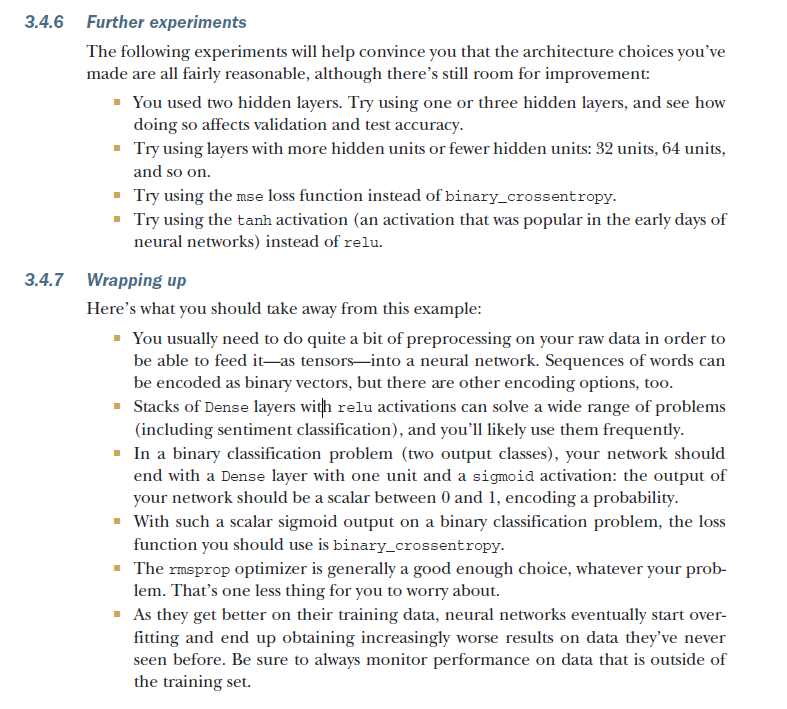